In [13]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv("healthcare_data.csv")
# Data Cleaning
# Check for missing values and duplicates
print(df.isna().sum())
print(df.duplicated().sum())
# Convert VisitDate to datetime format
df["VisitDate"] = pd.to_datetime(df["VisitDate"])
# Ensure all numeric columns have correct numeric types
print(df.dtypes)


PatientID         0
Age               0
Gender            0
BMI               0
BloodPressure     0
ChronicDisease    0
Smoker            0
VisitDate         0
Symptoms          0
dtype: int64
0
PatientID                  int64
Age                        int64
Gender                    object
BMI                      float64
BloodPressure              int64
ChronicDisease            object
Smoker                    object
VisitDate         datetime64[ns]
Symptoms                  object
dtype: object


In [14]:
# Create New Columns
# AgeCategory
def agecat(age):
    if age < 18:
        return "Child"
    elif age >= 18 and age < 60:
        return "Adult"
    else :
        return "Senior"
df["agecat"] = df["Age"].apply(agecat)
# BMICategory
def bmicat(bmi):
    if bmi < 18.5 :
        return "Underweight"
    elif bmi >= 18.5 and bmi < 24.9:
        return "Normal"
    elif bmi >= 19.9 and bmi <= 25:
        return "Overweight"
    else:
        return "Obese"
df["BMICategory"] = df["BMI"].apply(bmicat)
# HighBP
def HBP(BP):
    if BP > 140:
        return "Yes"
    else:
        return "No"
df["HighBP"] = df["BloodPressure"].apply(HBP)
display(df)

,PatientID,Age,Gender,BMI,BloodPressure,ChronicDisease,Smoker,VisitDate,Symptoms,agecat,BMICategory,HighBP
0,1,34,Male,27.5,120,No,No,2024-01-03,Headache,Adult,Obese,No
1,2,58,Female,32.1,145,Yes,Yes,2024-01-04,Fatigue,Adult,Obese,Yes
2,3,45,Male,29.8,138,Yes,No,2024-01-05,Chest Pain,Adult,Obese,No
3,4,23,Female,22.3,110,No,No,2024-01-06,Fever,Adult,Normal,No
4,5,67,Male,31.7,160,Yes,Yes,2024-01-07,Dizziness,Senior,Obese,Yes
5,6,51,Female,28.4,142,Yes,No,2024-01-08,Breathing Issues,Adult,Obese,Yes
6,7,39,Male,33.5,155,Yes,Yes,2024-01-09,Chest Pain,Adult,Obese,Yes
7,8,29,Female,24.1,118,No,No,2024-01-10,Fever,Adult,Normal,No
8,9,72,Male,26.9,165,Yes,Yes,2024-01-11,Breathing Issues,Senior,Obese,Yes
9,10,41,Female,30.2,135,Yes,No,2024-01-12,Fatigue,Adult,Obese,No


In [15]:
#  Required Analyses
# Average BMI
print(f"the average of bmi is : {df["BMI"].mean()}")
# Gender distribution (count)
gd = df["Gender"].value_counts()
display(gd)
x = gd["Male"] + gd["Female"]
print(f"""we have {gd["Male"] / x *100  } % of Male
and {gd["Female"]/ x * 100} % of Female""")
# Percentage of smokers
pos = df["Smoker"].value_counts()
display(pos)
y = pos["Yes"] + pos["No"]
print(f"""we have {pos["Yes"] / y *100  }) % of Smokers
and {pos["No"]/ y * 100} % of Non Smokers""")
# Most common symptom
mcs = df["Symptoms"].value_counts()
print(f" the most common symptom is {mcs.idxmax()}")
# Average blood pressure per chronic disease group
abppcdg = df.groupby("Symptoms")["BloodPressure"].mean()
display(abppcdg)
# age category has the highest number of chronic cases
achncc = df[["ChronicDisease", "agecat"]]
nd = achncc[achncc["ChronicDisease"] == "Yes"]
print(nd.value_counts())
print("so adults has the highest number of chronic cases")


the average of bmi is : 28.633333333333326


Gender
Male      8
Female    7
Name: count, dtype: int64

we have 53.333333333333336 % of Male
and 46.666666666666664 % of Female


Smoker
No     8
Yes    7
Name: count, dtype: int64

we have 46.666666666666664) % of Smokers
and 53.333333333333336 % of Non Smokers
 the most common symptom is Chest Pain


Symptoms
Breathing Issues    152.00
Chest Pain          150.75
Dizziness           145.00
Fatigue             140.00
Fever               114.00
Headache            116.00
Name: BloodPressure, dtype: float64

ChronicDisease  agecat
Yes             Adult     7
                Senior    3
Name: count, dtype: int64
so adults has the highest number of chronic cases


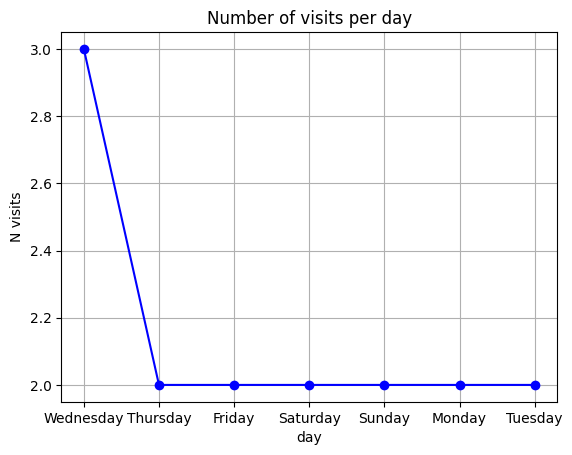

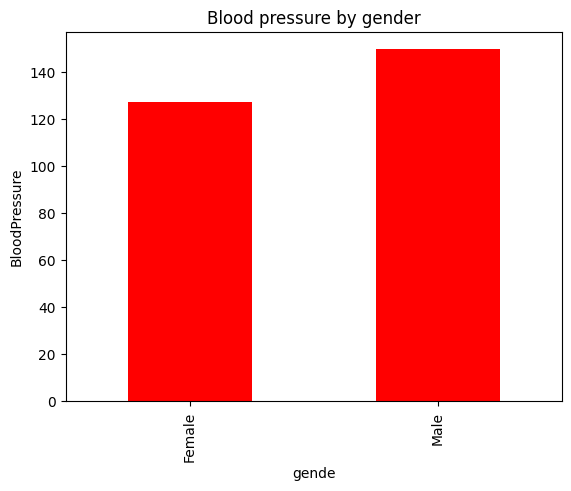

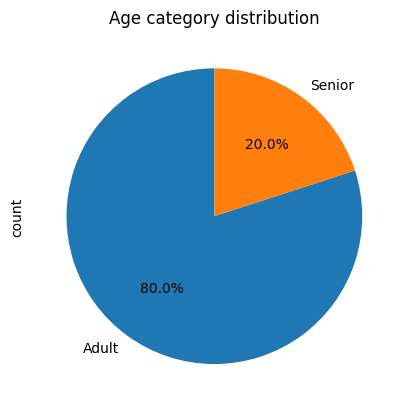

In [16]:

# Visualizations
d = df.groupby("Gender")["BloodPressure"].mean()
da = df["agecat"].value_counts()
df["day"] = df["VisitDate"].dt.day_name()
nv = df["day"].value_counts()
# Line chart: Number of visits per day
nv.plot(kind="line", color="blue", marker="o", title="Number of visits per day")
plt.xlabel("day")
plt.ylabel("N visits")
plt.grid(True)
plt.show()
# Bar chart: Blood pressure by gender
d.plot(kind="bar", color="Red", title="Blood pressure by gender")
plt.xlabel("gende")
plt.ylabel("BloodPressure")
plt.show()
#  Pie chart: Age category distribution
da.plot(kind="pie", autopct="%1.1f%%", startangle=90, title="Age category distribution")
plt.show()